## Korrelationen
Zeigt Korrelationen und Ausprägung der Korrelation zwischen Features des Datensets an.

##### Importe & Preprocessing

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import src.package.importer as imp
import src.package.importer_usages as imp_usg
import src.package.consts as c

plt.figure(figsize=(16, 6))

# import ans preprocess dataset
df = imp.get_extended_dataset('../package/datasets/full_dataset.csv')
df_usg = imp_usg.extract_usage_details(df)

# threshold for correlation matrix to show results
THRESHOLD = 0.9

# preprocess data
correlations = df_usg.corr()

# select relevant features and remove duplicates
mask = np.triu(np.ones_like(correlations, dtype=bool))
cut_off = 0.5  # only show cells with abs(correlation) at least this value
mask |= np.abs(correlations) < cut_off
correlations = correlations[~mask]
annot = [[f"{val:.5f}"
          for val in row] for row in correlations.to_numpy()]

<Figure size 1152x432 with 0 Axes>

### Alle Features
Zeigt Korrelationen zwischen allen Variablen / Features auf. (Big Picture)

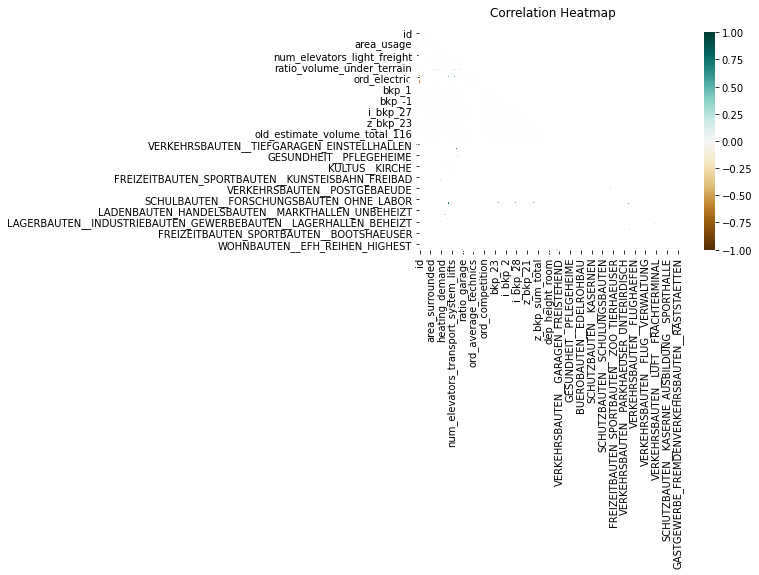

In [16]:
heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

### Unabhängige & Abhängige Variablen
Zeigt Korrelation der unabhängigen Variablen mit der abhängigen Variable (HNF-GF Ratio).

In [17]:
# preproccess
correlations = correlations[[c.FIELD_HNF_GF_RATIO]].sort_values(by=c.FIELD_HNF_GF_RATIO, ascending=False)

# plot
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with HNF-GF Ratio', fontdict={'fontsize':11}, pad=16);

ValueError: `data` and `annot` must have same shape.

<Figure size 576x864 with 0 Axes>

## Garagen

Hat eine vorhandene Garage eine Korrelation zur HNF-GF Ratio?
Plot zeigt Verteilung des ratios für Gebäude mit und ohne Garage (Indoor).

In [ ]:
# preprocess
df_usg[c.GARAGE_INDOOR_PRESENT] = df_usg[c.GARAGE_INDOOR_PRESENT].astype('category')
data = df_usg[c.FIELD_HNF_GF_RATIO]

# plot
gf = sns.catplot(x=c.GARAGE_INDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=df_usg)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe
data.groupby(df_usg[c.GARAGE_INDOOR_PRESENT]).count()

In [ ]:
# preprocess
df_usg[c.GARAGE_OUTDOOR_PRESENT] = df_usg[c.GARAGE_OUTDOOR_PRESENT].astype('category')
data = df_usg[c.FIELD_HNF_GF_RATIO]

# plot
gf = sns.catplot(x=c.GARAGE_OUTDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=df_usg)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe
data.groupby(df_usg[c.GARAGE_OUTDOOR_PRESENT]).count()
